In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
my_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/pseudocells_Danai/txt_files/"

In [6]:
# Phenotype (genes X pseudo-cells)
phenotype_file = my_dir+"Pseudobulk_DA_pseudocells_res4.tsv.pkl"
phenotype = pd.read_pickle(phenotype_file)
phenotype.head()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
HPSI0714i-iudw_1--DA--d30--0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.900116,0.0,...,0.0,0.0,0.0,0.000000,1.514001,0.0,0.0,0.0,0.0,0.0
HPSI0714i-iudw_1--DA--d30--1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.775420,0.0,...,0.0,0.0,0.0,0.388600,1.932043,0.0,0.0,0.0,0.0,0.0
HPSI0714i-iudw_1--DA--d30--2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.603750,0.0,...,0.0,0.0,0.0,0.000000,0.446621,0.0,0.0,0.0,0.0,0.0
HPSI0714i-iudw_1--DA--d30--3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.215118,0.0,...,0.0,0.0,0.0,0.000000,1.280547,0.0,0.0,0.0,0.0,0.0
HPSI0714i-iudw_1--DA--d30--4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.389510,0.0,...,0.0,0.0,0.0,0.373329,3.733828,0.0,0.0,0.0,0.0,0.0


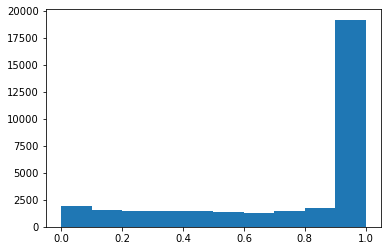

In [17]:
plt.hist((phenotype == 0).astype(int).sum(axis=0)/phenotype.shape[0])
plt.show()

In [18]:
sum((phenotype == 0).astype(int).sum(axis=0)/phenotype.shape[0]>0.2)

29272

In [20]:
29272/32738

0.8941291465575173

In [19]:
sum((phenotype == 0).astype(int).sum(axis=0)/phenotype.shape[0]>0.3)

27785

In [21]:
27785/32738

0.8487079235139593

In [27]:
# Filter on specific gene-SNP pairs
# eQTL from neuroseq DA (day30 + day52 + day52 ROT treated)
neuro_eqtl_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/input_files/DA_eqtl_allconditions_FDR5pct.csv" # consider filter further (significant only)
neuro_eqtl = pd.read_csv(neuro_eqtl_file)
neuro_eqtl.head()

,snp_id,feature
0,9_36382790_A_G,ENSG00000137075
1,9_37422656_C_T,ENSG00000137106
2,9_35595006_T_G,ENSG00000198722
3,5_79950781_A_G,ENSG00000113318
4,5_81395824_T_G,ENSG00000152348


In [24]:
genes = neuro_eqtl['feature'].unique()
len(genes)

1374

In [41]:
#load map HGNC to ensembl
mapping_df = pd.read_csv('/nfs/leia/research/stegle/dseaton/genomes/hg19/annotation/geneid_mappings/hgnc_symbol2ensembl_gene_id.txt', sep='\t')

In [33]:
phenotype_df = phenotype.copy()
phenotype_df.head()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
HPSI0714i-iudw_1--DA--d30--0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.900116,0.0,...,0.0,0.0,0.0,0.000000,1.514001,0.0,0.0,0.0,0.0,0.0
HPSI0714i-iudw_1--DA--d30--1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.775420,0.0,...,0.0,0.0,0.0,0.388600,1.932043,0.0,0.0,0.0,0.0,0.0
HPSI0714i-iudw_1--DA--d30--2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.603750,0.0,...,0.0,0.0,0.0,0.000000,0.446621,0.0,0.0,0.0,0.0,0.0
HPSI0714i-iudw_1--DA--d30--3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.215118,0.0,...,0.0,0.0,0.0,0.000000,1.280547,0.0,0.0,0.0,0.0,0.0
HPSI0714i-iudw_1--DA--d30--4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.389510,0.0,...,0.0,0.0,0.0,0.373329,3.733828,0.0,0.0,0.0,0.0,0.0


In [39]:
# phenotype_df = phenotype_df.transpose()
phenotype_list = phenotype_df.index
phenotype_list

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [42]:
mapping_df.head()

,hgnc_symbol,ensembl_gene_id
0,SLC25A26,ENSG00000261657
1,NaN,ENSG00000223116
2,HMGA1P6,ENSG00000233440
3,RNY3P4,ENSG00000207157
4,LINC00362,ENSG00000229483


In [43]:
mapping_df = mapping_df.query('hgnc_symbol in @phenotype_list')
mapping_df = mapping_df.drop_duplicates(subset=['hgnc_symbol'])
mapping_df = mapping_df.set_index('hgnc_symbol')

In [44]:
# limit only to hgnc symbols that map to ensembl gene IDs
phenotype_df = phenotype_df.loc[mapping_df.index,:]
phenotype_df.index = mapping_df['ensembl_gene_id']
phenotype_df.head()

,HPSI0714i-iudw_1--DA--d30--0,HPSI0714i-iudw_1--DA--d30--1,HPSI0714i-iudw_1--DA--d30--2,HPSI0714i-iudw_1--DA--d30--3,HPSI0714i-iudw_1--DA--d30--4,HPSI0714i-iudw_1--DA--d30--5,HPSI0714i-iudw_1--DA--d30--6,HPSI0714i-iudw_1--DA--d30--7,HPSI0714i-iudw_1--DA--d30--8,HPSI0714i-iudw_1--DA--d30--9,...,HPSI0114i-rozh_4--DA--d52_tr--3,HPSI0114i-rozh_4--DA--d52_tr--4,HPSI0114i-rozh_4--DA--d52_tr--5,HPSI0114i-rozh_4--DA--d52_tr--6,HPSI0114i-rozh_4--DA--d52_tr--7,HPSI0114i-rozh_4--DA--d52_tr--8,HPSI0114i-rozh_4--DA--d52_tr--9,HPSI0114i-rozh_4--DA--d52_tr--10,HPSI0114i-rozh_4--DA--d52_tr--11,HPSI0114i-rozh_4--DA--d52_tr--12
ensembl_gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000261657,2.557058,0.817285,0.406268,1.617208,0.833736,0.957703,0.0,0.518151,1.779975,1.7302,...,2.281446,2.674164,3.642436,4.216954,0.0,6.633148,0.0,0.0,0.0,0.0
ENSG00000229483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
ENSG00000232849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
ENSG00000229558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
ENSG00000224394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [45]:
pheno = phenotype_df.loc[genes]
pheno.shape

(1374, 9982)

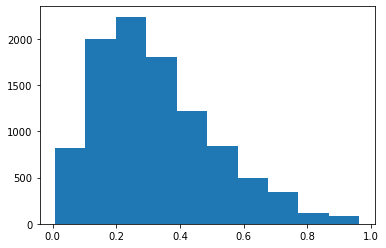

In [52]:
plt.hist((pheno == 0).astype(int).sum(axis=0)/pheno.shape[0])
plt.show()

In [54]:
sum((pheno == 0).astype(int).sum(axis=1)/pheno.shape[1]>0.2)

826

In [55]:
826/1374

0.6011644832605532

In [56]:
sum((pheno == 0).astype(int).sum(axis=1)/pheno.shape[1]>0.3)

617

In [57]:
617/1374

0.44905385735080056

In [58]:
1374-617

757